# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*



## Classifer model generalization exercises

Tasks: 

1. Test if the problem (given the dataset) is linearly separabile, compare Logistic Regresion and Decision Trees.  

2. Evaluate when the Decision Tree starts overfitting with regard to the tree depth.  

3. Tune DT hyperparameters using cross-validation with grid search technique. Report the best hyperparameters and achieved accuracy. 

In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Sample data

In [2]:
X, y = make_classification(n_samples=10000, n_features=20,
                           n_informative=5, n_redundant=15, random_state=1)

In [3]:
# Classes
np.unique(y)

array([0, 1])

In [4]:
# Split traina nd test (50%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### 1. Is the problem linearly separable? 
Test logistic regression model. 

In [5]:
# instantiate Logistic regression model

model = LogisticRegression()


In [6]:
# fit model
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
# train accuracy
train_pred = model.predict(X_train)

In [8]:
# test accuracy
test_pred = model.predict(X_test)

In [9]:
# Evalaute the model
MSE_train = accuracy_score(y_train, train_pred)
print(f"Accuracy train: {round(MSE_train, 3)}")
MSE_test = accuracy_score(y_test, test_pred) 
print(f"Accuracy test: {round(MSE_test, 3)}")

Accuracy train: 0.854
Accuracy test: 0.865


### Compare it with Decision Tree Classifier

In [22]:
# DT model
dt_model = DecisionTreeClassifier(max_depth=10) 

In [23]:
# fit 
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [24]:
# train accuracy
train_pred = dt_model.predict(X_train)
MSE_train = accuracy_score(y_train, train_pred)
print(f"Accuracy train: {round(MSE_train, 3)}")

Accuracy train: 0.967


In [25]:
# test accuracy
test_pred = dt_model.predict(X_test)
MSE_test = accuracy_score(y_test, test_pred) 
print(f"Accuracy test: {round(MSE_test, 3)}")

Accuracy test: 0.918


### 2. When the DT() model starts overfitting with regard to the depth of the tree? 

In [33]:
# Run set of training procedures and evaluation while changing the dtree depth from 1 to 10 
# Store the training and testing accuracy 
depth = list(range(1,11))

acc_train_list = []
acc_test_list = []

for d in depth:
    # DT model
    dt_model = DecisionTreeClassifier(max_depth=d)

    # fit 
    dt_model.fit(X_train, y_train)

    # train accuracy
    train_pred = dt_model.predict(X_train)
    Acc_train = accuracy_score(y_train, train_pred)
    acc_train_list.append(Acc_train*100)

    # test accuracy
    test_pred = dt_model.predict(X_test)
    Acc_test = accuracy_score(y_test, test_pred)
    acc_test_list.append(Acc_test*100)    

In [34]:
print(depth)
print(acc_train_list)
print(acc_test_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[76.88000000000001, 80.38, 88.08, 90.06, 91.24, 93.22, 94.02000000000001, 94.86, 95.7, 96.7]
[76.44, 80.9, 87.94, 89.68, 90.32, 91.47999999999999, 91.72, 91.67999999999999, 91.94, 91.46]


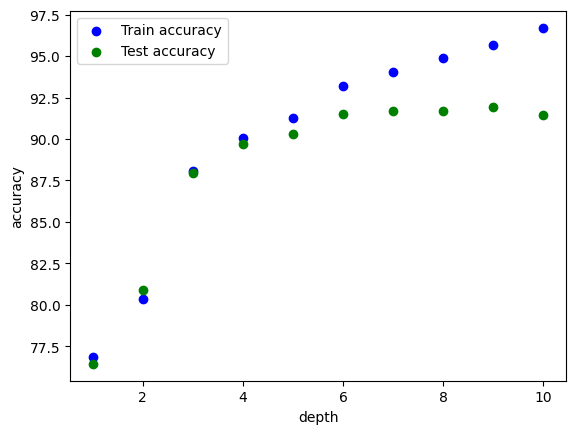

In [36]:
# Plot dependence of the model training and testing accuracy against the depth of the model.

# for i in range(10):
#     plt.scatter(depth[i], acc_train_list[i], c="b", label="Train accuracy")
#     plt.scatter(depth[i], acc_test_list[i], c="g", label="Test accuracy")

plt.scatter(depth, acc_train_list, c="b", label="Train accuracy")
plt.scatter(depth, acc_test_list, c="g", label="Test accuracy")
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.legend(loc="best")

In [ ]:
# When the model starts overfitting? 
# at depth == 5 

### 3. Finetune the DT model through cross-validation and grid search, report accuracy. 

In [37]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# instantiate the model
model = DecisionTreeClassifier() 

In [38]:
# Apply grid search of hyperparameters and cross-validation 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
hyperparameter_space = {'max_depth': [2,4,6,8,10,15,20,50,100],
                        'min_samples_leaf': [1,2,4,6,8,10,20,30]}

gs = GridSearchCV(model, param_grid=hyperparameter_space, n_jobs=2,
                  scoring="accuracy", cv=5, return_train_score=True)

# run fit (be aware: takes longer!) - dělá to kombinaci všech hyperparametrů
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 15, 20, 50, 100],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30]},
             return_train_score=True, scoring='accuracy')

In [39]:
# Optimal parameters and scores 
print("Optimal hyperparameter combination: ", gs.best_params_)
print("Mean cross-validated accuracy of the best_estimator: ", round(gs.best_score_ * 100, 2))

Optimal hyperparameter combination:  {'max_depth': 8, 'min_samples_leaf': 4}
Mean cross-validated accuracy of the best_estimator:  91.56


In [41]:
# Test accuracy
test_pred = gs.predict(X_test)
Acc_test = accuracy_score(y_test, test_pred) 
print(f"Accuracy test: {round(Acc_test, 3)*100} %")


Accuracy test: 91.7 %


In [ ]:
# Evaluate the result 